In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/Heart Failure Prediction.csv")


In [4]:
sns.set(rc={'figure.figsize': [9,9]}, font_scale=1.2)

<h1><font color = 'brown'>Categories</font></h1>

## RestingBP: resting blood pressure ##
## FastingBS: fasting blood sugar ## 
## RestingECG: resting electrocardiogram results ##
## MaxHR: maximum heart rate achieved ##
## ExerciseAngina: exercise induced angina ##
## Oldpeak: oldpeak = ST ##

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h1><font color = 'brown'>Objectives:</font></h1>


<h3><font color = 'green'>Our primary objective is to try to understand what factors affect the patient's probability to develop heart disease and help us understand its strong and weak indicators<br><br>
    
As we go along, we will find new patterns to explore in the data.Therefore, its hard to list all of the tasks that we will have to do, but it's always useful to have a list of things that we need to do for starters  </font></h3>

### 1)Basic corrilation between all numerical attributes

### 2)Explore any medium/high correlations between numerical attributes

### 3)Explore the relationship between heartdisease and other numerical/Categorical attributes

### 4)Conclusion


<h1><font color = 'brown'>Basic Correlation between all numerical attributes</font></h1>

In [4]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Primary Observations #
### 1)Age(Num) & MaxHR(Num) ==> -ve medium Correlation 
### 2)FastingBP(Cat) & HeartDisease(Cat) ==> +ve medium Corrleation 
### 3)MaxHR(Num) & HeartDisease(Cat) ==> -ve medium Corrleation
### 4)Oldpeak(Num) & HeartDisease(Cat) ==> +ve medium Corrleation

## To Be Explored...
#### Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slop

### 1)Explore Oldpeak(Num)

In [98]:
print(df['Oldpeak'].describe()[['mean','std']])
print('mode   ', df['Oldpeak'].mode()[0])

mean    0.887364
std     1.066570
Name: Oldpeak, dtype: float64
mode    0.0


[Text(0.5, 1.0, 'Oldpeak values for all patients')]

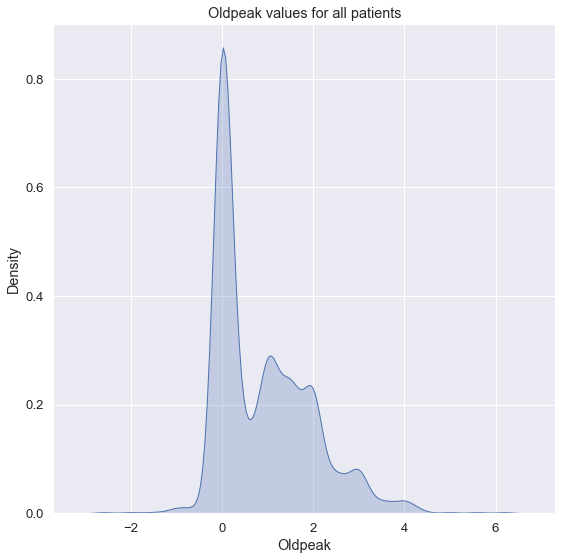

In [240]:
sns.kdeplot(x='Oldpeak',data=df,bw_adjust=0.75,shade=True).set(title="Oldpeak values for all patients")

<h2><font color = 'orange'>Obs: A lot of patients seem to have oldpeak level equal to 0

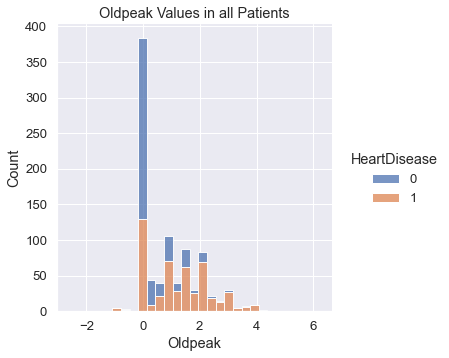

In [226]:
sns.displot(x='Oldpeak',hue = 'HeartDisease',color='b',data=df,multiple='stack').set(title="Oldpeak Values in all Patients")

In [66]:
len(df[df['Oldpeak'] == 0]) / len(df)

0.4008714596949891

<font color = 'blue'>Note: 40% of all data has Oldpeak  of zero

In [5]:
#adding category OPzero_or_not to df
def zeroOrNot(row):
    if row['Oldpeak'] == 0:
        return 0
    else: return 1
    
df['OPzero_or_not'] = df.apply(zeroOrNot,axis = 1)

In [6]:
#splitting non_zero_Oldpeak,Zero_Oldpeak from df

non_zero_Oldpeak = df[df['Oldpeak'] != 0]
zero_Oldpeak = df[df['Oldpeak'] == 0]

In [7]:
df[['Oldpeak','OPzero_or_not']].sample(5)

,Oldpeak,OPzero_or_not
578,3.0,1
162,0.0,0
629,0.0,0
304,2.2,1
229,0.0,0


<h4><font color = 'green'> ==> New Category Added (OPzero_or_not) and created two new datasets (zero_Oldpeak, non_zero_Oldpeak) for easier handling<br></font></h4>
<font color = 'blue'> OPzero_or_not = 0 ==> People with 0 Oldpeak<br>
OPzero_or_not = 1 == > People with variable Oldpeak </font>
  

[Text(0.5, 1.0, 'Oldpeak levels for non-zero patients')]

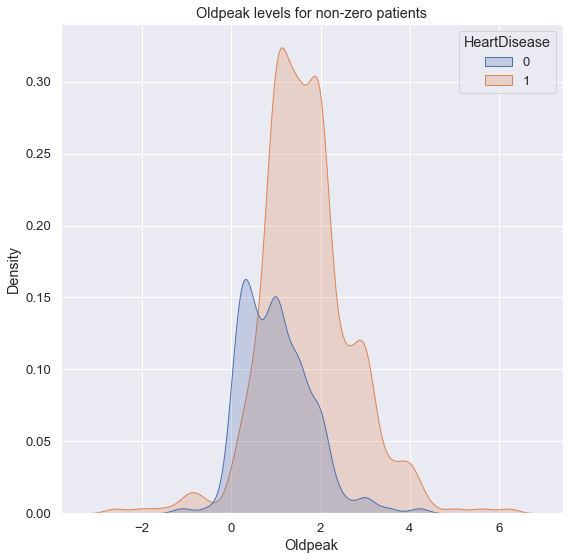

In [8]:
sns.kdeplot(x='Oldpeak',data=non_zero_Oldpeak,hue = 'HeartDisease',bw_adjust=0.75,shade=True).set(title="Oldpeak levels for non-zero patients")

[Text(0.5, 1.0, 'Heart Disease patients and healthy people with zero Oldpeak')]

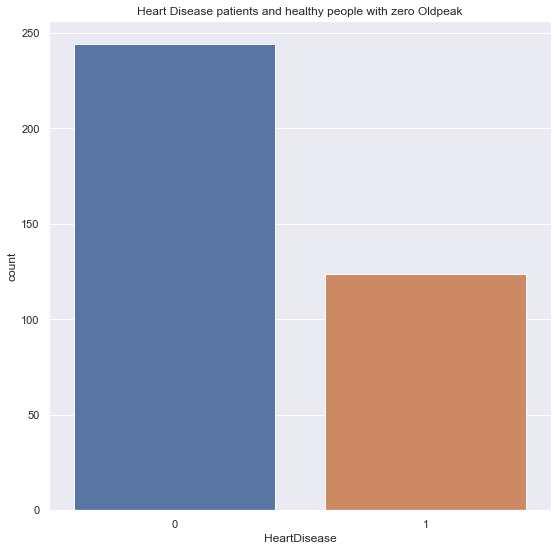

In [69]:
sns.countplot(x='HeartDisease',data=zero_Oldpeak).set(title='Heart Disease patients and healthy people with zero Oldpeak')

In [33]:
non_zero_Oldpeak['Oldpeak'].mean()

1.4810909090909092

<h2><font color='orange'>Observations: Heart Disease patients tend to have an overall higher Oldpeak value</font></h2>

<font color='blue'>Around 40% of the data has 0 Oldpeak, while the rest is distributed between 0.0 and 4.0, average 1.4 </font>

# Relationships between different Numerical Attributes #

### 1) Relationship between FastingBP(Cat) & MaxHR(Num) (Obs 2 & 3)

In [20]:
df.groupby('FastingBS')['MaxHR'].describe()

,count,mean,std,min,25%,50%,75%,max
FastingBS,,,,,,,,
0,704.0,138.653409,25.226976,60.0,120.00,140.0,158.0,202.0
1,214.0,130.742991,25.339652,67.0,112.25,130.0,150.0,194.0


<AxesSubplot:title={'center':'Max Heart Rate for Fasting/Non-Fasting Patients'}, xlabel='FastingBS', ylabel='MaxHR'>

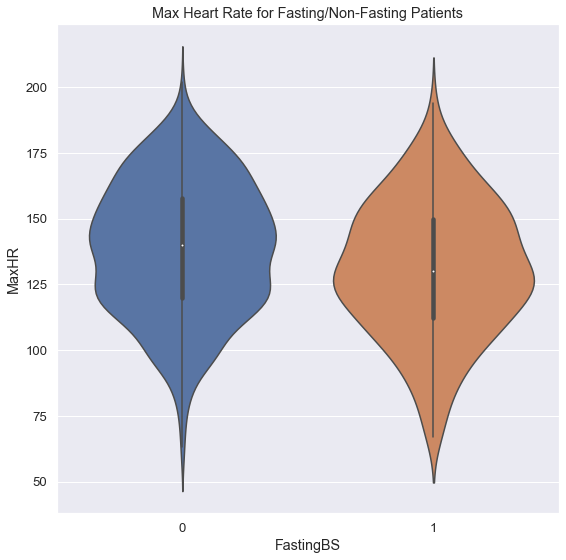

In [131]:
plt.title("Max Heart Rate for Fasting/Non-Fasting Patients")
sns.violinplot(x='FastingBS',y='MaxHR',data=df)

<font color = 'blue'>Note: Fasting Patients seem to have a slightly lower Maximum Heart Rate

<AxesSubplot:title={'center':'Max Heart Rate for Fasting/Non-Fasting Patients'}, xlabel='MaxHR', ylabel='Density'>

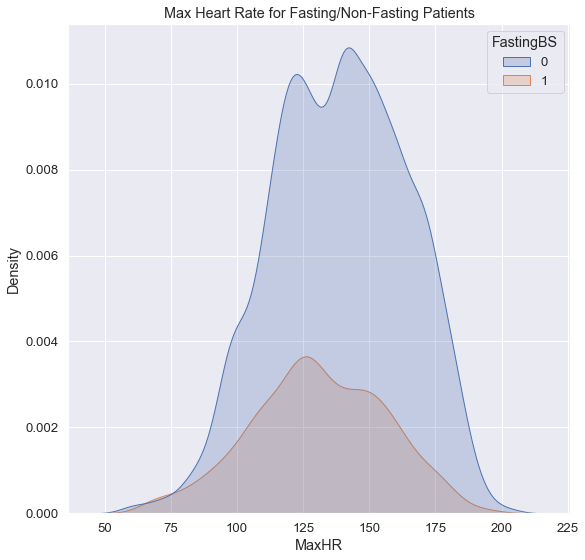

In [8]:
plt.title("Max Heart Rate for Fasting/Non-Fasting Patients")
sns.kdeplot(x='MaxHR',data=df,hue='FastingBS',bw_adjust=0.75,shade=True)

<font color='blue'>Note: The Dataset Contains way Less Fasting Patients. However, Fasting appears to have minimal to no effect on Max Heart Rate Achieved (slight decrease)

# ========== #

### 2) Relationship between OPzero_or_not(Cat) & MaxHR(Num)

[Text(0.5, 1.0, 'Oldpeak levels for Fasting/non-Fasting of non-zero Oldpeak Patients')]

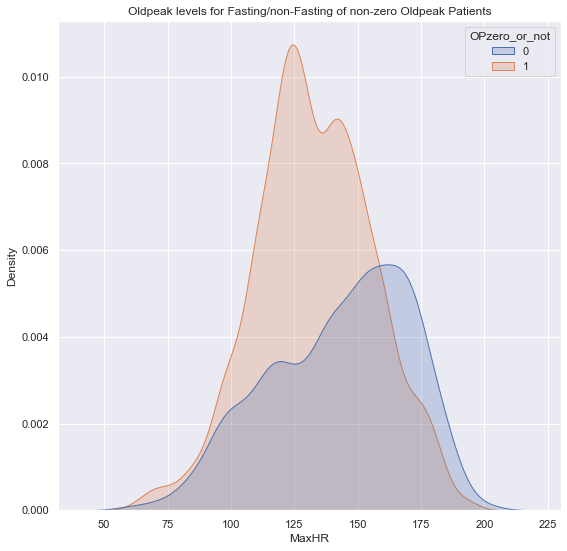

In [76]:
#data with non_zero_Oldpeak
plot = sns.kdeplot(x='MaxHR',data=df,hue='OPzero_or_not',bw_adjust=0.75,shade=True)
plot.set(title="Oldpeak levels for Fasting/non-Fasting of non-zero Oldpeak Patients")

<h2><font color='orange'>Obs: Patients with Zero Oldpeak have on average a Higher maximum Heart Rate

# ========== #

### 3)relationship between FastingBS(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

In [18]:
pd.pivot_table(index='FastingBS',columns='OPzero_or_not',values='MaxHR',data=df,aggfunc='mean')

OPzero_or_not,0,1
FastingBS,,
0,145.194888,133.416880
1,129.909091,131.031447


<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='FastingBS', ylabel='MaxHR'>

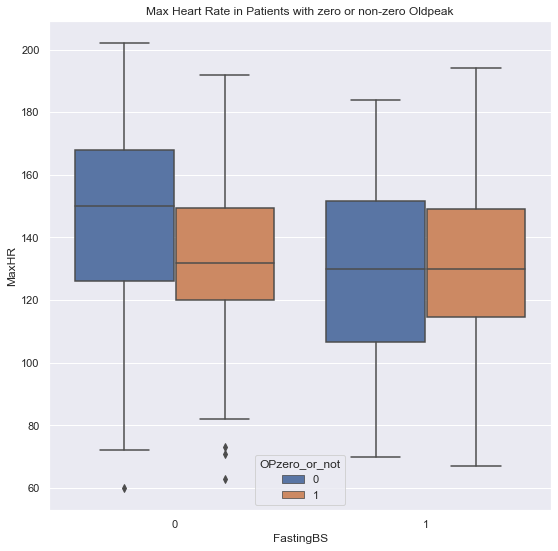

In [77]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.boxplot(x='FastingBS',y='MaxHR',hue='OPzero_or_not',data=df)

<h2><font color='orange'>Observation: Non Fasting patients with Oldpeak value of 0 have the highest average Maximum Heart Rate...</font><h2>

### 4)relationship between Sex(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='Sex', ylabel='MaxHR'>

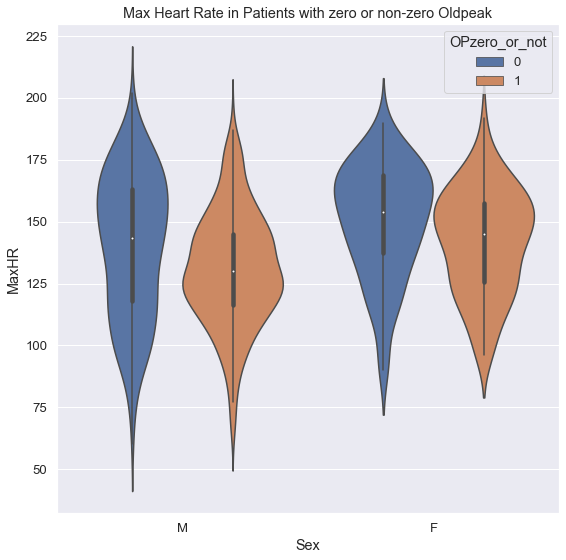

In [36]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.violinplot(x='Sex',y='MaxHR',hue='OPzero_or_not',data=df)

### 5)relationship between ChestPain(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='ChestPainType', ylabel='MaxHR'>

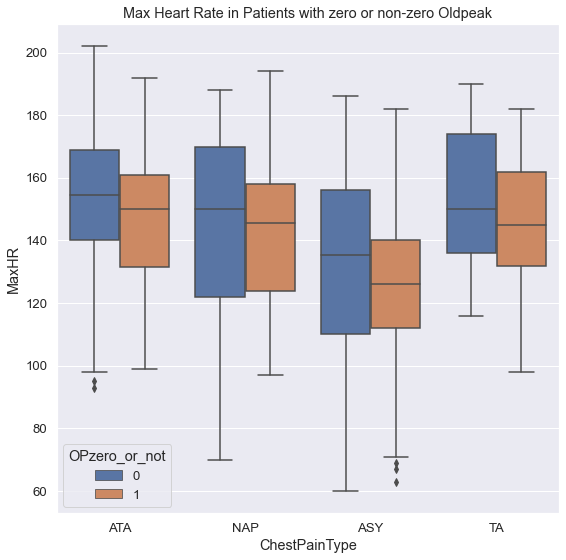

In [41]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.boxplot(x='ChestPainType',y='MaxHR',hue='OPzero_or_not',data=df)

### 6)relationship between RestingECG(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='RestingECG', ylabel='MaxHR'>

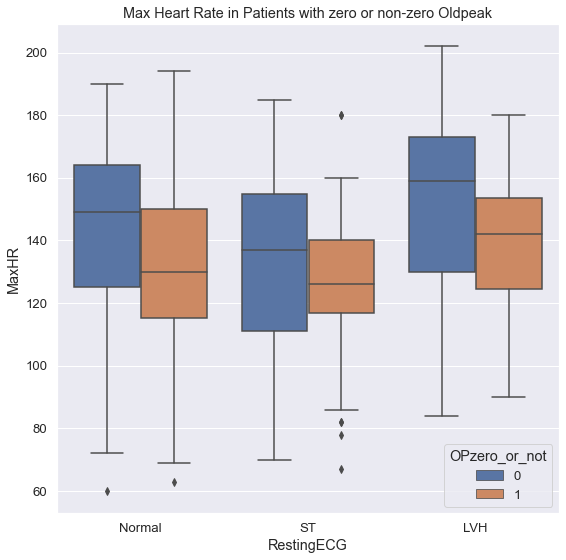

In [54]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.boxplot(x='RestingECG',y='MaxHR',hue='OPzero_or_not',data=df)

### 7)relationship between ExerciseAngina(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='ExerciseAngina', ylabel='MaxHR'>

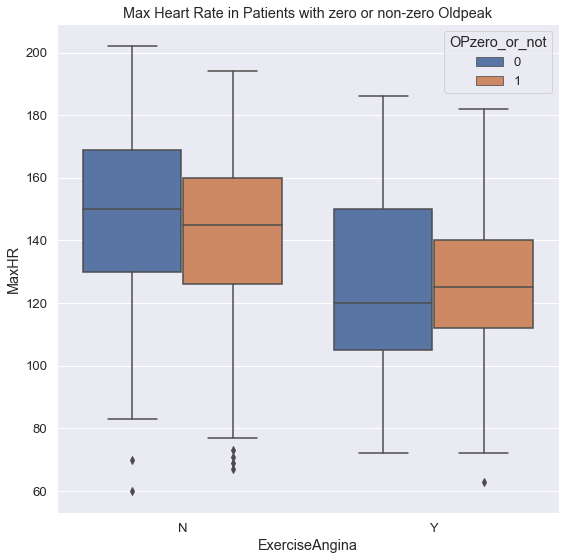

In [34]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.boxplot(x='ExerciseAngina',y='MaxHR',hue='OPzero_or_not',data=df)

<font color='blue'>Obs: Patients without ExerciseAngina Have a higher Maximum Heart Rate

### 8)relationship between ST_Slope(Cat), Zero/Non-Zero Oldpeak (Cat) and MaxHR(Num) 

<AxesSubplot:title={'center':'Max Heart Rate in Patients with zero or non-zero Oldpeak'}, xlabel='ST_Slope', ylabel='MaxHR'>

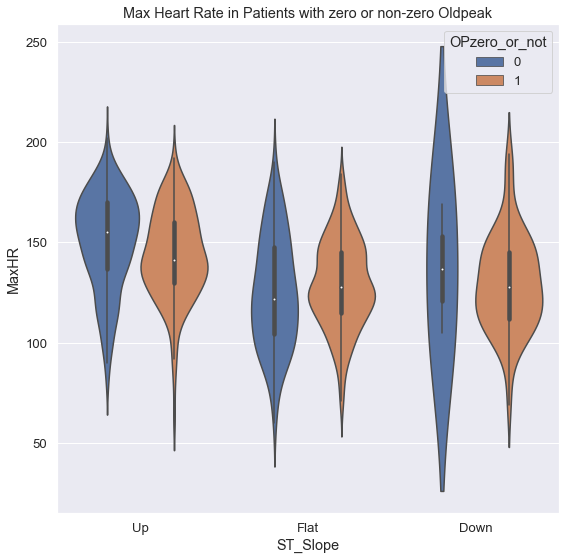

In [43]:
plt.title("Max Heart Rate in Patients with zero or non-zero Oldpeak")
sns.violinplot(x='ST_Slope',y='MaxHR',hue='OPzero_or_not',data=df)

<h2><font color = 'orange'>Observation: </font></h2>

<h3>Patients with Zero Oldpeak have - on average - a Higher maximum Heart Rate. Other factors that seem to increase Heart Rate are Not-Fasting, and not having ExcerciseAngina and an ‘Up’ ST_Slope.</h3>

# Relationship between heart disease and other Numerical Attributes

### 1)relationship between HeartDisease(Cat) and Zero/Non-Zero Oldpeak(Cat)

<AxesSubplot:xlabel='OPzero_or_not', ylabel='count'>

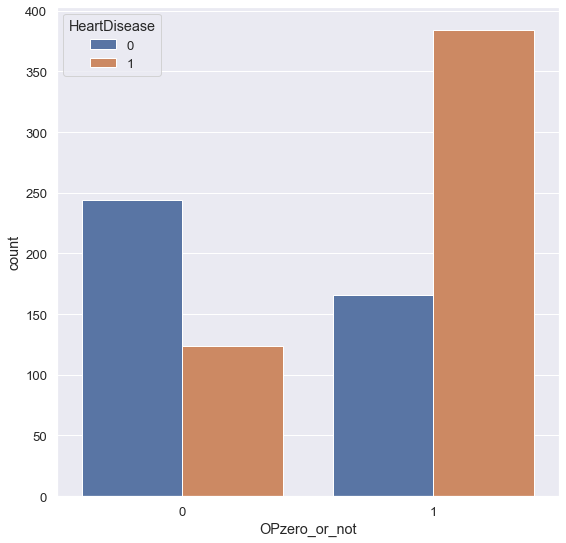

In [49]:
sns.countplot(x='OPzero_or_not',hue='HeartDisease',data=df)

In [53]:
380/(380+170)

0.6909090909090909

<h2><font color='blue'>Obs:</font></h2>
<h2><font color='purple'>Most healthy People have oldpeak equal zero</font></h2>
<h2><font color='orange'>Most Heart Disease Patients have Oldpeak not equal zero</font><h2>


### relationship between HeartDisease(Cat), Zero/Non-Zero Oldpeak (Cat) and different Numberical Attributes

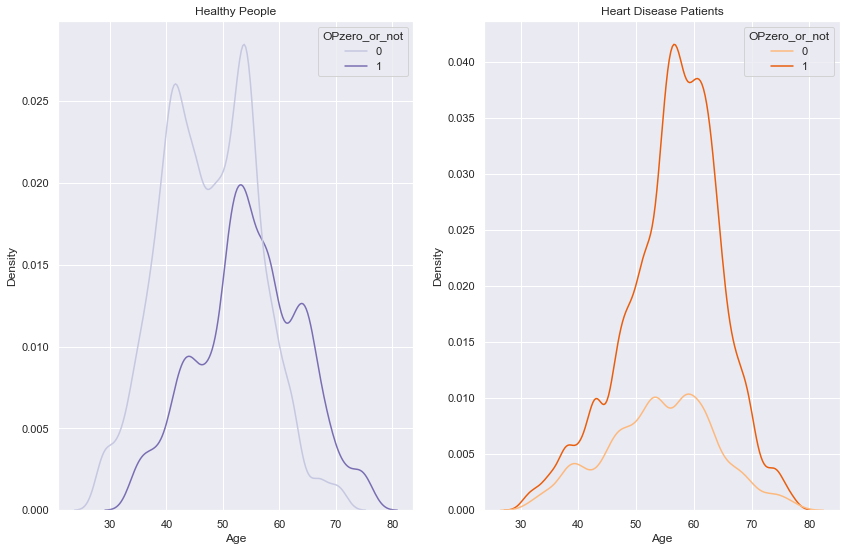

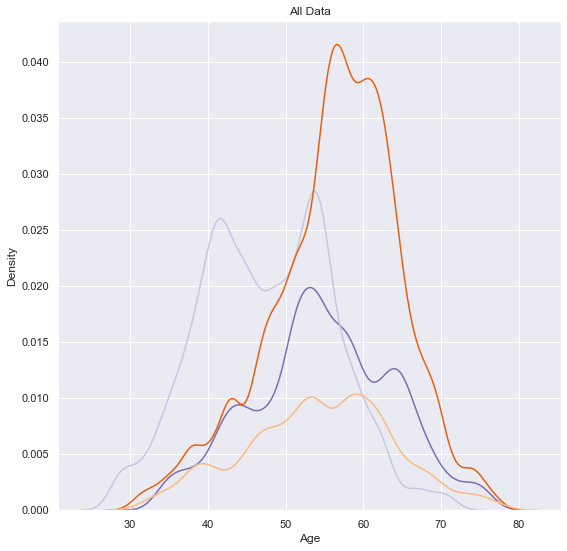

In [44]:
#Age
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

sns.kdeplot(x='Age',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',ax=ax[0],multiple='layer',bw_adjust=.5).set(title = 'Healthy People')
sns.kdeplot(x='Age',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',ax=ax[1],multiple='layer',bw_adjust=.5).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

#plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='Age',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',multiple='layer',bw_adjust=.5,legend=False)#.set(title = 'Healthy People')
#plt.show()

#plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='Age',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',multiple='layer',bw_adjust=.5,legend=False).set(title = 'All Data')
plt.show()

<font color = 'blue'>Note:
<br>most healthy people are around 50~55 with an almost standard deviation, while most heart disease Patients are aged 60 and up.
<br><br>Also, the're graph is left skewed...meaning that even more sick patients tend to be older.</font>

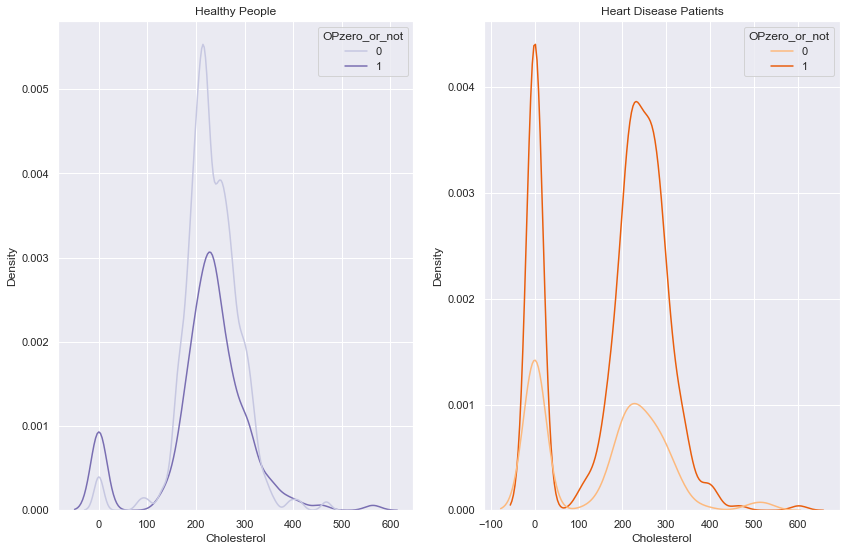

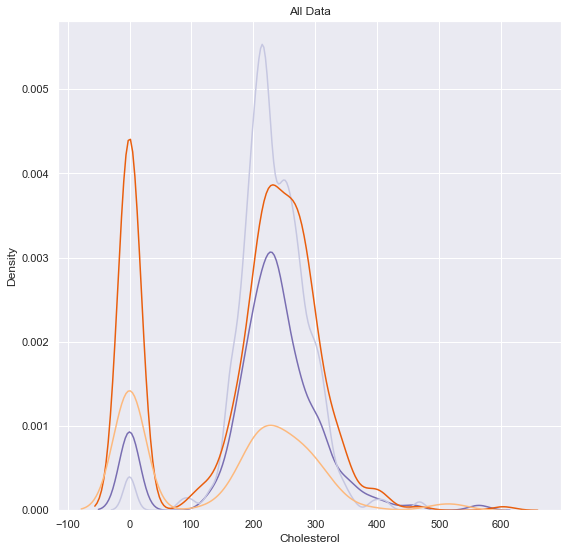

In [43]:
#Cholesterol
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

sns.kdeplot(x='Cholesterol',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',ax=ax[0],multiple='layer',bw_adjust=.5).set(title = 'Healthy People')
sns.kdeplot(x='Cholesterol',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',ax=ax[1],multiple='layer',bw_adjust=.5).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

#plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='Cholesterol',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',multiple='layer',bw_adjust=.5,legend=False)#.set(title = 'Healthy People')
#plt.show()

#plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='Cholesterol',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',multiple='layer',bw_adjust=.5,legend=False).set(title = 'All Data')
plt.show()

<h2><font color = 'orange'> Observations:</font></h2>

<h3>most healthy people tend to have a lower cholesterol level (200 to 240) than heart disease patients (230 to 280).</h3>

<h3>Heart Disease Patients tend to have a wider range (less uniform)</h3>


<h3>Most people who have a cholesterol of zero tend to be heart disease patients.
however, this exteremly abnormal amount of zero cholesterol patients might be pointing
to a problem in data collection/corruption...</h3>

In [131]:
bad_data = df[(df['Cholesterol'] == 0)]

In [134]:
bad_data[bad_data['HeartDisease'] == 1]['Age'].count(),df['Age'].count() #16% of 'bad' data is sick

(152, 918)

In [135]:
df[df['HeartDisease'] == 1]['Age'].count(),df['Age'].count() #55% of normal data is sick

(508, 918)

<font color = 'blue'>Note: 16% of data with 0 cholesterol are Heart disease patients, while 55% of all data has heart disease</font>

![Cat](images/Cholesterol.PNG)

<font color = 'blue'>Note: Cholesterol equal 0 needs further studying - </font><a href = 'https://www.health.harvard.edu/blog/ldl-cholesterol-how-low-can-you-safely-go-2020012018638'>Article source</a>

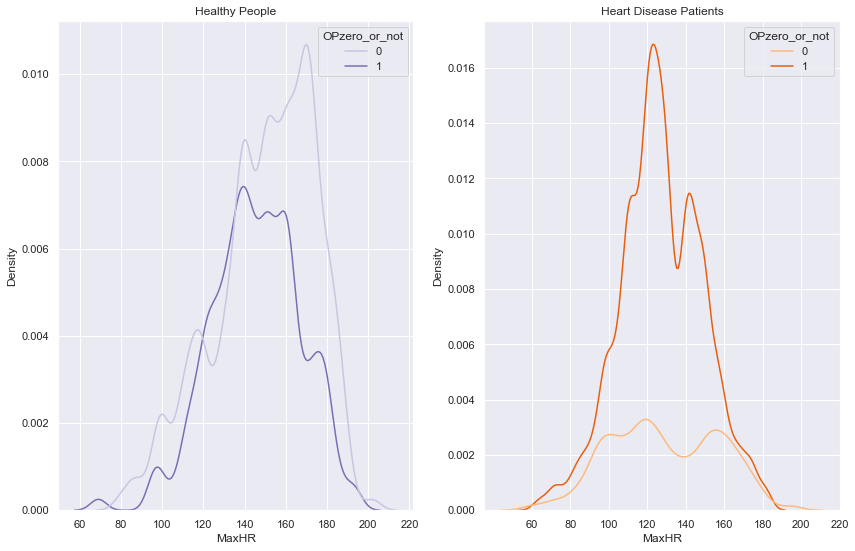

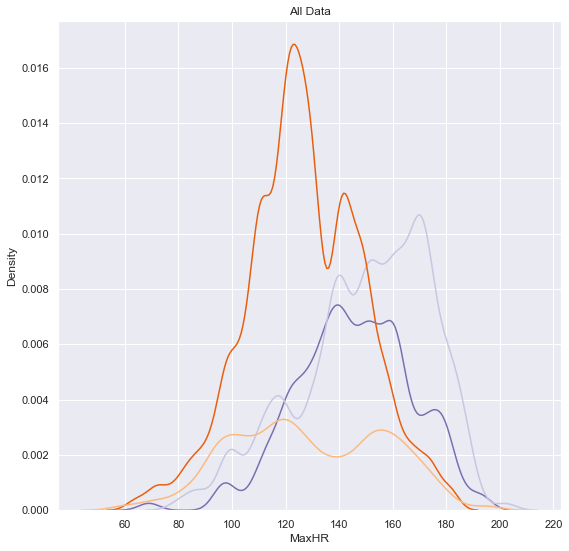

In [22]:
#MaxHR
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

#plt.xticks([0,50,100,150,200,250])
sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',ax=ax[0],multiple='layer',bw_adjust=.5).set(title = 'Healthy People')

#plt.xticks([0,50,100,150,200,250])
sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',ax=ax[1],multiple='layer',bw_adjust=.5).set(title = 'Heart Disease Patients')

plt.xticks([60,80,100,120,140,160,180,200,220])
plt.show()
sns.set(rc={'figure.figsize': [9,9]})


plt.xticks([60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',multiple='layer',bw_adjust=.5,legend=False)#.set(title = 'Healthy People')

plt.xticks([60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',multiple='layer',bw_adjust=.5,legend=False).set(title = 'All Data')
plt.show()

# plt.xticks([60,80,100,120,140,160,180,200,220])
# sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',multiple='layer',bw_adjust=.5)#.set(title = 'Healthy People')


# plt.xticks([60,80,100,120,140,160,180,200,220])
# sns.kdeplot(x='MaxHR',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',multiple='layer',bw_adjust=.5).set(title = 'All Data')
# plt.legend(loc='upper left',title='OPzero_or_not')
# plt.show()

<h2><font color = 'orange'>Observations:</font></h2> 

<h3>althought both grapths seem to be roughly standard, Max heart rate of Heart disease patients seems to be alot lower centered around 120~130. while healthy subjects hover around 140 ~ 165.</h3>

<h3>For the healthy people,the second grapth - people with Oldpeak at zero - is skewed to the left, which says that on average these people have a higher max heart rate than other healthy people with variable Oldpeak values.</h3>

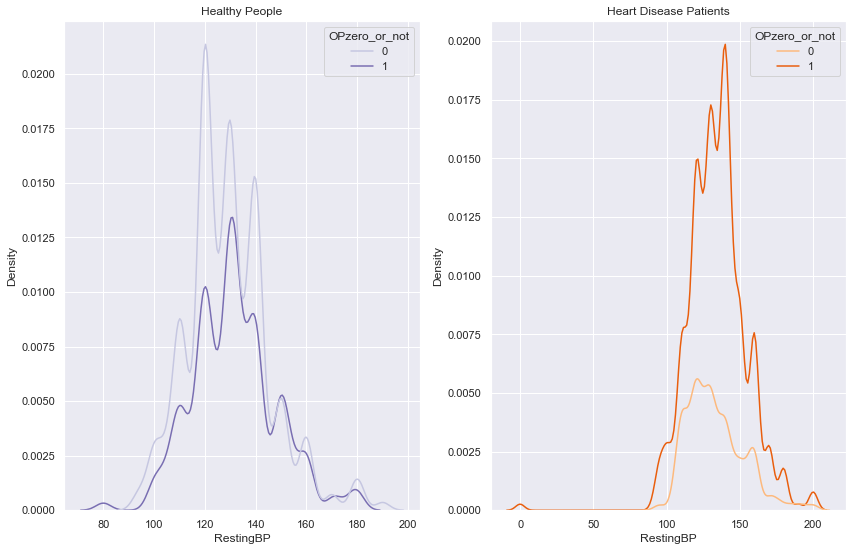

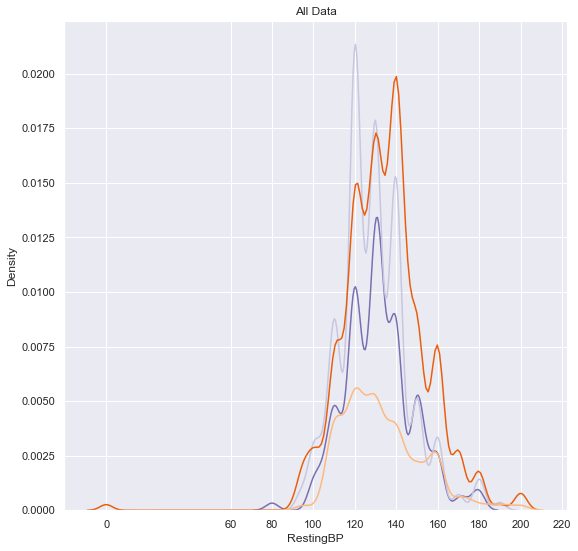

In [45]:
#RestingBP
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

sns.kdeplot(x='RestingBP',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',ax=ax[0],multiple='layer',bw_adjust=.5).set(title = 'Healthy People')

sns.kdeplot(x='RestingBP',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',ax=ax[1],multiple='layer',bw_adjust=.5).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='RestingBP',hue='OPzero_or_not',data=df[df['HeartDisease']==0],palette='Purples',multiple='layer',bw_adjust=.5,legend=False)#.set(title = 'Healthy People')
#plt.show()

plt.xticks([0,60,80,100,120,140,160,180,200,220])
sns.kdeplot(x='RestingBP',hue='OPzero_or_not',data=df[df['HeartDisease']==1],palette='Oranges',multiple='layer',bw_adjust=.5,legend=False).set(title = 'All Data')
plt.show()

In [57]:
df[df['HeartDisease']==0]['RestingBP'].std() 

16.49958463598397

In [56]:
 df[df['HeartDisease']==1]['RestingBP'].std()

19.828684733555757

In [64]:
16.5/19.8

0.8333333333333333

<h2><font color = 'orange'>Observation:</font></h2>
    
<h3>All the data seems to be hovering around the 130 mark. However, Heart disease Patient's blood pressure has 15% higher standard deviation, highlighting the fact that heart disease patients have less consistent Blood pressure. </h3>

<font color = 'blue'>Furthermore, Heart Disease Patients with zero Oldpeak tend to have a lower std than other patients with a right skew in their data. This points to them generally having even less blood pressure than Normal Patients</font>

In [140]:
 df[(df['HeartDisease']==0) & (df['OPzero_or_not'] == 0)][['Age','MaxHR','RestingBP']].describe()

,Age,MaxHR,RestingBP
count,244.000000,244.000000,244.000000
mean,47.676230,149.987705,129.274590
std,8.582551,24.293555,16.406438
min,28.000000,80.000000,94.000000
25%,41.000000,136.750000,120.000000
50%,48.000000,153.500000,130.000000
75%,54.000000,170.000000,140.000000
max,71.000000,202.000000,190.000000


In [141]:
 df[(df['HeartDisease']==1) & (df['OPzero_or_not'] == 0)][['Age','MaxHR','RestingBP']].describe()

,Age,MaxHR,RestingBP
count,124.000000,124.000000,124.000000
mean,54.306452,128.983871,133.217742
std,9.527178,28.499033,19.538813
min,32.000000,60.000000,95.000000
25%,48.000000,105.750000,120.000000
50%,54.000000,125.500000,130.000000
75%,61.000000,153.250000,145.000000
max,77.000000,195.000000,200.000000


In [146]:
 df[(df['HeartDisease']==1) & (df['OPzero_or_not'] == 1)][['Age','MaxHR','RestingBP']].describe()

,Age,MaxHR,RestingBP
count,384.000000,384.000000,384.000000
mean,56.414062,127.226562,134.497396
std,8.401350,21.504343,19.936583
min,31.000000,63.000000,0.000000
25%,52.000000,113.000000,120.000000
50%,57.000000,126.000000,134.000000
75%,62.000000,142.000000,145.000000
max,77.000000,182.000000,200.000000


# relationship between HeartDisease(Cat), Zero/Non-Zero Oldpeak (Cat) and different Categorical Attributes

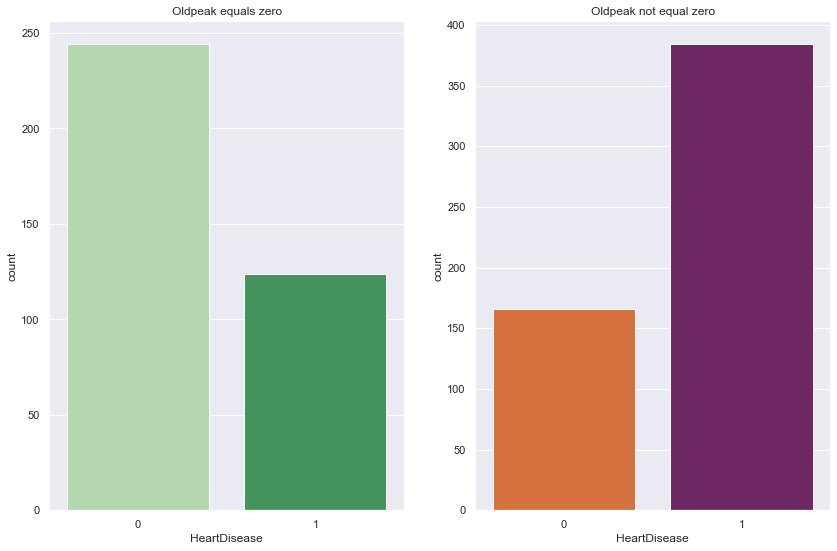

In [195]:
#Sex
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['HeartDisease']))
sns.countplot(x='HeartDisease',data=df[df['OPzero_or_not']==0],order = my_order,palette='Greens',ax=ax[0]).set(title = 'Oldpeak equals zero')

sns.countplot(x='HeartDisease',data=df[df['OPzero_or_not']==1],order = my_order,palette='inferno_r',ax=ax[1]).set(title = 'Oldpeak not equal zero')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<font color = 'blue'>Note: as discussed before, most people with Oldpeak equal zero are healthy, and vice versa</font>

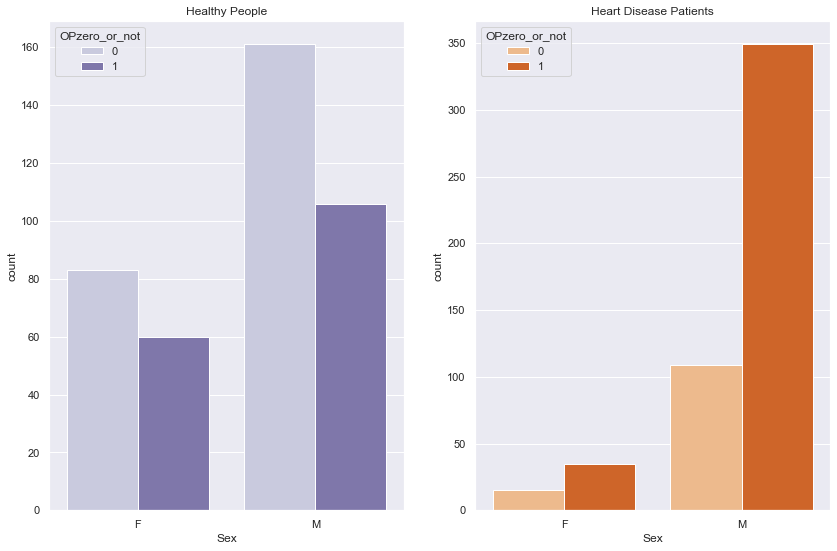

In [181]:
#Sex
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['Sex']))
sns.countplot(x='Sex',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='Sex',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

In [185]:
450/725 #len(df[df['Sex']=='M']) #725

0.6206896551724138

In [188]:
70/193 #len(df[df['Sex']=='F'])  #193

0.3626943005181347

<font color = 'blue'>Note: <font color ='brown'> 62% of males </font> in the dataset Have Heart disease, while only 36% of females are sick.</font>

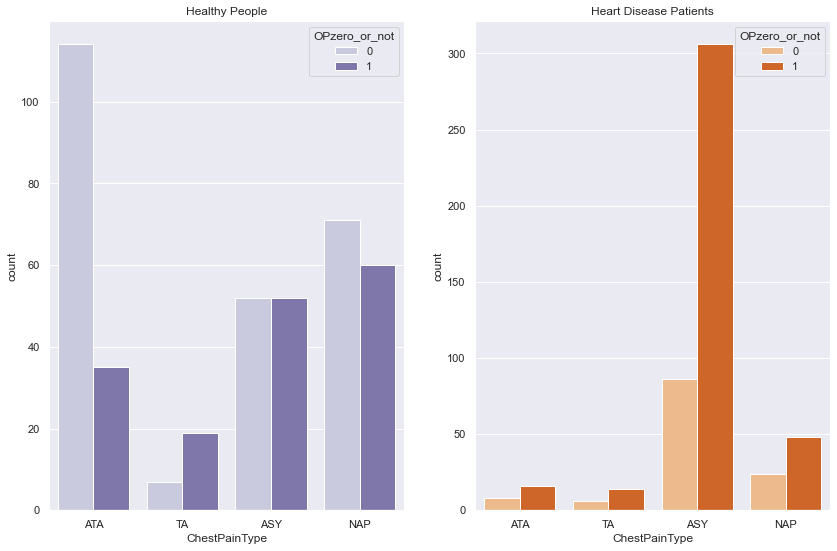

In [175]:
#ChestPainType
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['ChestPainType']))
sns.countplot(x='ChestPainType',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='ChestPainType',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<h2><font color = 'orange'>Observation:</font></h2>

<h3><font color='brown'>Chest Pain Type ASY </font>is Highly correlated with Heart Disease, Espeically for Patients with irregular Oldpeak values</h3>

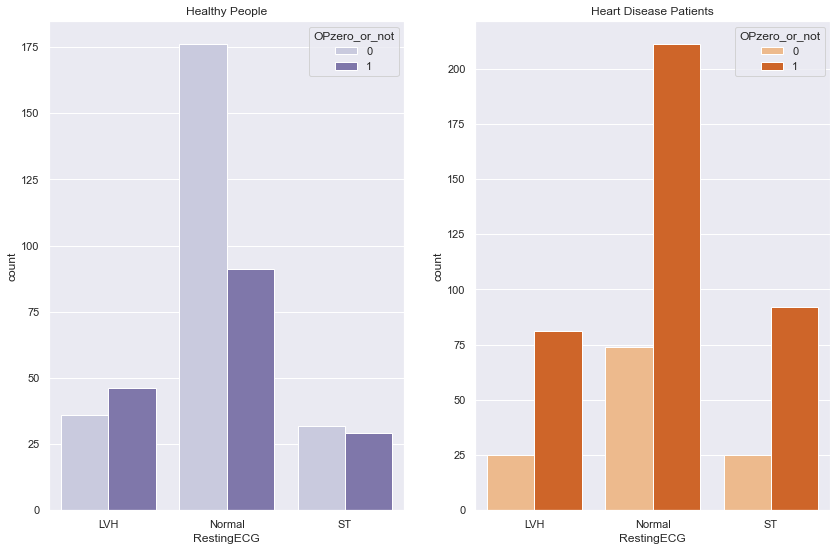

In [176]:
#RestingECG
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['RestingECG']))
sns.countplot(x='RestingECG',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='RestingECG',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<font color = 'blue'>Note:</font>
<font color = 'brown'>Resting ECG type 'ST' </font>is elevated for Heart Disease Patients with variable Oldpeak Levels.

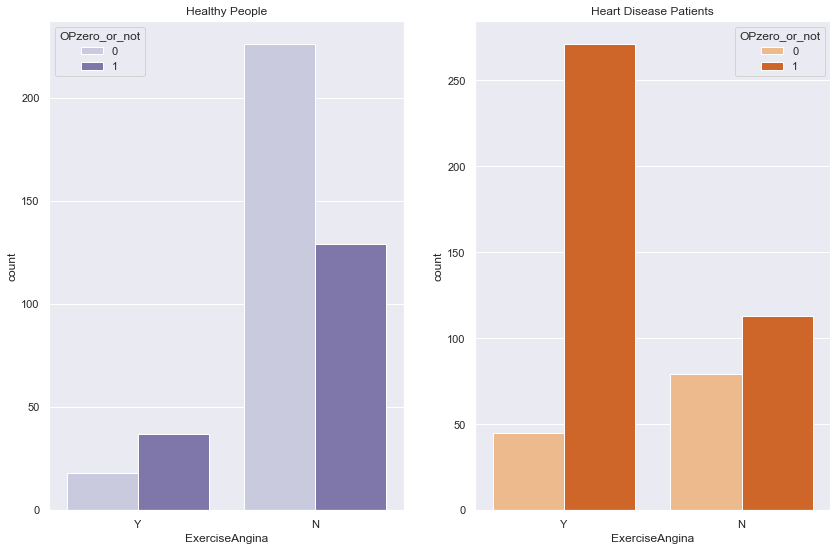

In [177]:
#ExcerciseAngina
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['ExerciseAngina']))
sns.countplot(x='ExerciseAngina',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='ExerciseAngina',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<h2><font color = 'orange'>Observation:</font></h2>

<h3> <font color='brown'> Exercise Angina</font> is highly correlated</font> with heart disease</h3> 

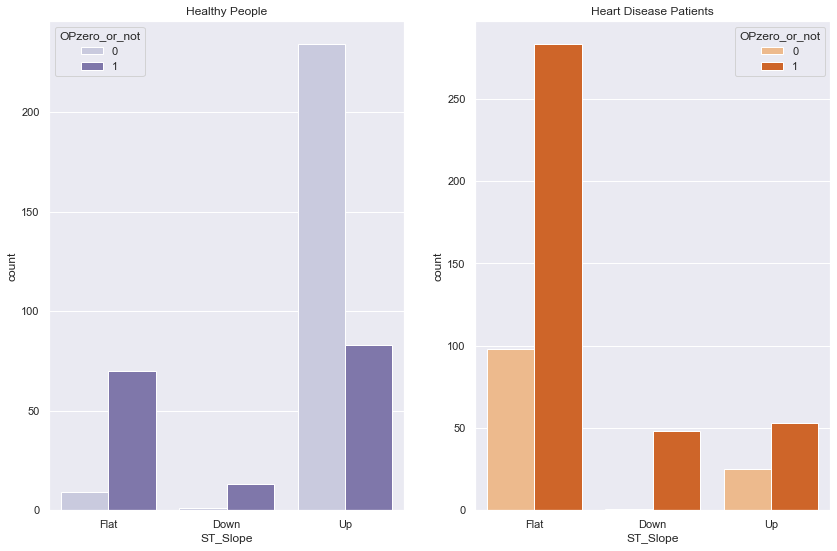

In [178]:
#ST_Slope
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['ST_Slope']))
sns.countplot(x='ST_Slope',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='ST_Slope',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<h2><font color = 'orange'>Observatoin:</font></h2>

<h3><font color = 'brown'>ST_Slope of 'Flat' </font> is highly correlated with Heart disease</h3>

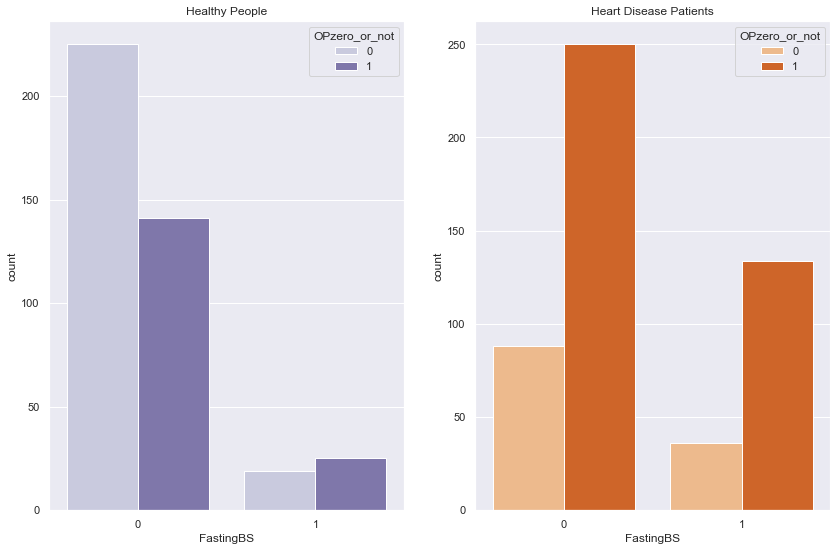

In [190]:
#FastingBS
sns.set(rc={'figure.figsize': [14,9]})
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize': [12,12]})

my_order = list(set(df['FastingBS']))
sns.countplot(x='FastingBS',data=df[df['HeartDisease']==0],order = my_order,hue='OPzero_or_not',palette='Purples',ax=ax[0]).set(title = 'Healthy People')

sns.countplot(x='FastingBS',data=df[df['HeartDisease']==1],order = my_order,hue='OPzero_or_not',palette='Oranges',ax=ax[1]).set(title = 'Heart Disease Patients')

plt.show()
sns.set(rc={'figure.figsize': [9,9]})

<font color = 'blue'>Tests are mostly conducted on non fasting Healthy people/Patients</font>

<h1>Conclusion</h1>

=================
<h2><font color = 'red'>Numerical Data: </font></h2>

<h2><font color='orange'>Heart Disease patients tend to have an overall higher Oldpeak value</font></h2>
<font color='blue'>Around 40% of the data has 0 Oldpeak, while the rest is distributed between 0.0 and 4.0, average 1.4 </font>


<h2><font color = '#347C2C'>Strong Indicators of heart disease</font></h2>
<h3><font color = '#B0E0E6'> low Maximum heart rate <br>old Age <br>variable Oldpeak (not zero)<br></font></h3>


<h2><font color = '#347C2C'>weak Indicators of heart disease</font></h2>
<h3><font color = '#B0E0E6'>high/low Resting Blood Pressure or cholesterol<br></font></h3>

<font color ='blue'>Note: Heart Disease Patients with zero_Oldpeak show signs that they are slightly closer to the healthy group - doing better - than other patients with variable Oldpeak. But the difference is almost negligible. 

===============
<h2><font color = 'red'>Categorical Data: </font></h2>



<h3>The dataset has contains a lot more Healthy zero_Olpeak People than Heart disease patients with zero_Oldpeak. that could be due to a stong relationship between health and Oldpeak category or could be a sign of missing data.
<br>

<h2><font color = '#347C2C'>Strong Indicators of heart disease</font></h2>
<h3><font color = '#B0E0E6'>ST_Slope of 'Flat' </font>
<font color='#B0E0E6'> Exercise Angina<br> 
<font color = '#B0E0E6'>Variable Oldpeak values<br>
<font color='#B0E0E6'>Chest Pain Type ASY </font></h3>


<font color = 'green'>zero Cholesterol might be an indicator of heart disease, but data integretiy needs to be confirmed first<br><br></font>
    
<font color ='blue'>Note: Healthy Zero_Oldpeak people tend to be younger than other Healthy People, have slightly higher Maximum heart rate, more stable blood pressure and cholesterol levels. which points to the possibility that they're the healthiest group of people.
<br><br> </font>